In [1]:
%run ../../src/asym_plotter.ipynb

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-sw15vkxu because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Welcome to JupyROOT 6.22/06


In [2]:
def get_params_1d(version,datatype_piplus,datatype_piminus):
    PROJECT_NAME="pipluspi0_prelim"
    MLmethod="catboost"
    bin_dirs, outdir,binyaml = get_dirs(PROJECT_NAME,MLmethod)
    for b in bin_dirs:
        if("test1d" in b):
            directory=b
            break
    params_ML_piplus = collect(directory,version,True,datatype_piplus,'')
    params_noML_piplus = collect(directory,version,True,datatype_piplus,'noML')
    
    PROJECT_NAME="piminuspi0_prelim"
    MLmethod="catboost"
    bin_dirs, outdir,binyaml = get_dirs(PROJECT_NAME,MLmethod)
    for b in bin_dirs:
        if("test1d" in b):
            directory=b
            break
    params_ML_piminus = collect(directory,version,True,datatype_piminus,'')
    params_noML_piminus = collect(directory,version,True,datatype_piminus,'noML')
    
    return params_ML_piplus,params_noML_piplus,params_ML_piminus,params_noML_piminus

In [3]:
def get_params_2d(version,datatype_piplus,datatype_piminus):
    PROJECT_NAME="pipluspi0_prelim"
    MLmethod="catboost"
    bin_dirs, outdir,binyaml = get_dirs(PROJECT_NAME,MLmethod)
    for b in bin_dirs:
        if("test2d" in b):
            directory=b
            break
    params_ML_piplus = collect(directory,version,True,datatype_piplus,'')
    params_noML_piplus = collect(directory,version,True,datatype_piplus,'noML')
    
    PROJECT_NAME="piminuspi0_prelim"
    MLmethod="catboost"
    bin_dirs, outdir,binyaml = get_dirs(PROJECT_NAME,MLmethod)
    for b in bin_dirs:
        if("test2d" in b):
            directory=b
            break
    params_ML_piminus = collect(directory,version,True,datatype_piminus,'')
    params_noML_piminus = collect(directory,version,True,datatype_piminus,'noML')
    
    return params_ML_piplus,params_noML_piplus,params_ML_piminus,params_noML_piminus

In [4]:
versions  = ['splot','sideband']
datatypes = ['nSidis','nSidis_Fall2018_inbending','nSidis_Fall2018_outbending','nSidis_Spring2019_inbending']

In [5]:
params_ML_piplus,params_noML_piplus,params_ML_piminus,params_noML_piminus = get_params_1d('splot','nSidis_Fall2018_inbending','nSidis_Fall2018_outbending')


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



# Comparison between ML and Non ML methods
---

In [49]:
def plotA(params_ML,params_noML):
    mods = get_modulations(2)[1]
    labels = ["A","B","C","D","E","F","G"]
    bins=["x","z","Mh"]
    # Comparison between methods plot
    fig,axs=plt.subplots(3,7,figsize=(14,6),dpi=500)
    fig.subplots_adjust(0,0,1,1,0.05,0.3)
    for r in range(3):

        # Get the bins
        for p in params_noML:
            if(p["name"][0]==bins[r]):
                p_noML=p
                break
        for p in params_ML:
            if(p["name"][0]==bins[r]):
                p_ML=p
                break

        xtitle = p_ML["name"][0]
        xbinwidth = (p_ML["rightEdge"]-p_ML["leftEdge"]).flatten()
        if(xtitle=="Mh"):
            xtitle="M_{h} [GeV]"
        x = p_ML["centers"].flatten()        
        # Line up ML and noML params to have same binning

        for c in range(7):

            y_ML, yerr_ML = p_ML[labels[c]], p_ML[labels[c]+"_err"]
            y_noML, yerr_noML = p_noML[labels[c]], p_noML[labels[c]+"_err"]

            x_ML = x+xbinwidth/12
            x_noML = x-xbinwidth/12
            # Plot
            axs[r,c].errorbar(x_ML,y_ML,yerr=yerr_ML,fmt=".", capsize=0, color="black",label=r"$\pi^{-}\pi^{0}$ CatBoost")
            axs[r,c].errorbar(x_noML,y_noML,yerr=yerr_noML,fmt=".", capsize=0, color="black",mfc='white',label=r"$\pi^{-}\pi^{0}$ Traditional")

            # Plot horizontal line at 0
            axs[r,c].axhline(0, ls='--', color='black', alpha=0.5)

            if(r==0):
                axs[r,c].set_title(r"${}$".format(mods[c]),fontsize=15) # Place title at top row

            axs[r,c].set_xlabel(r"${}$".format(xtitle),loc="right",fontsize=15) # Place 

            if(c>0):
                axs[r,c].set_yticks([]) # Remove yticks from inner plots
            if(c==0):
                axs[r,c].set_ylabel(r"$A_{LU}$",fontsize=15)
                axs[r,c].legend()
            axs[r,c].set_ylim(-0.06,0.06)

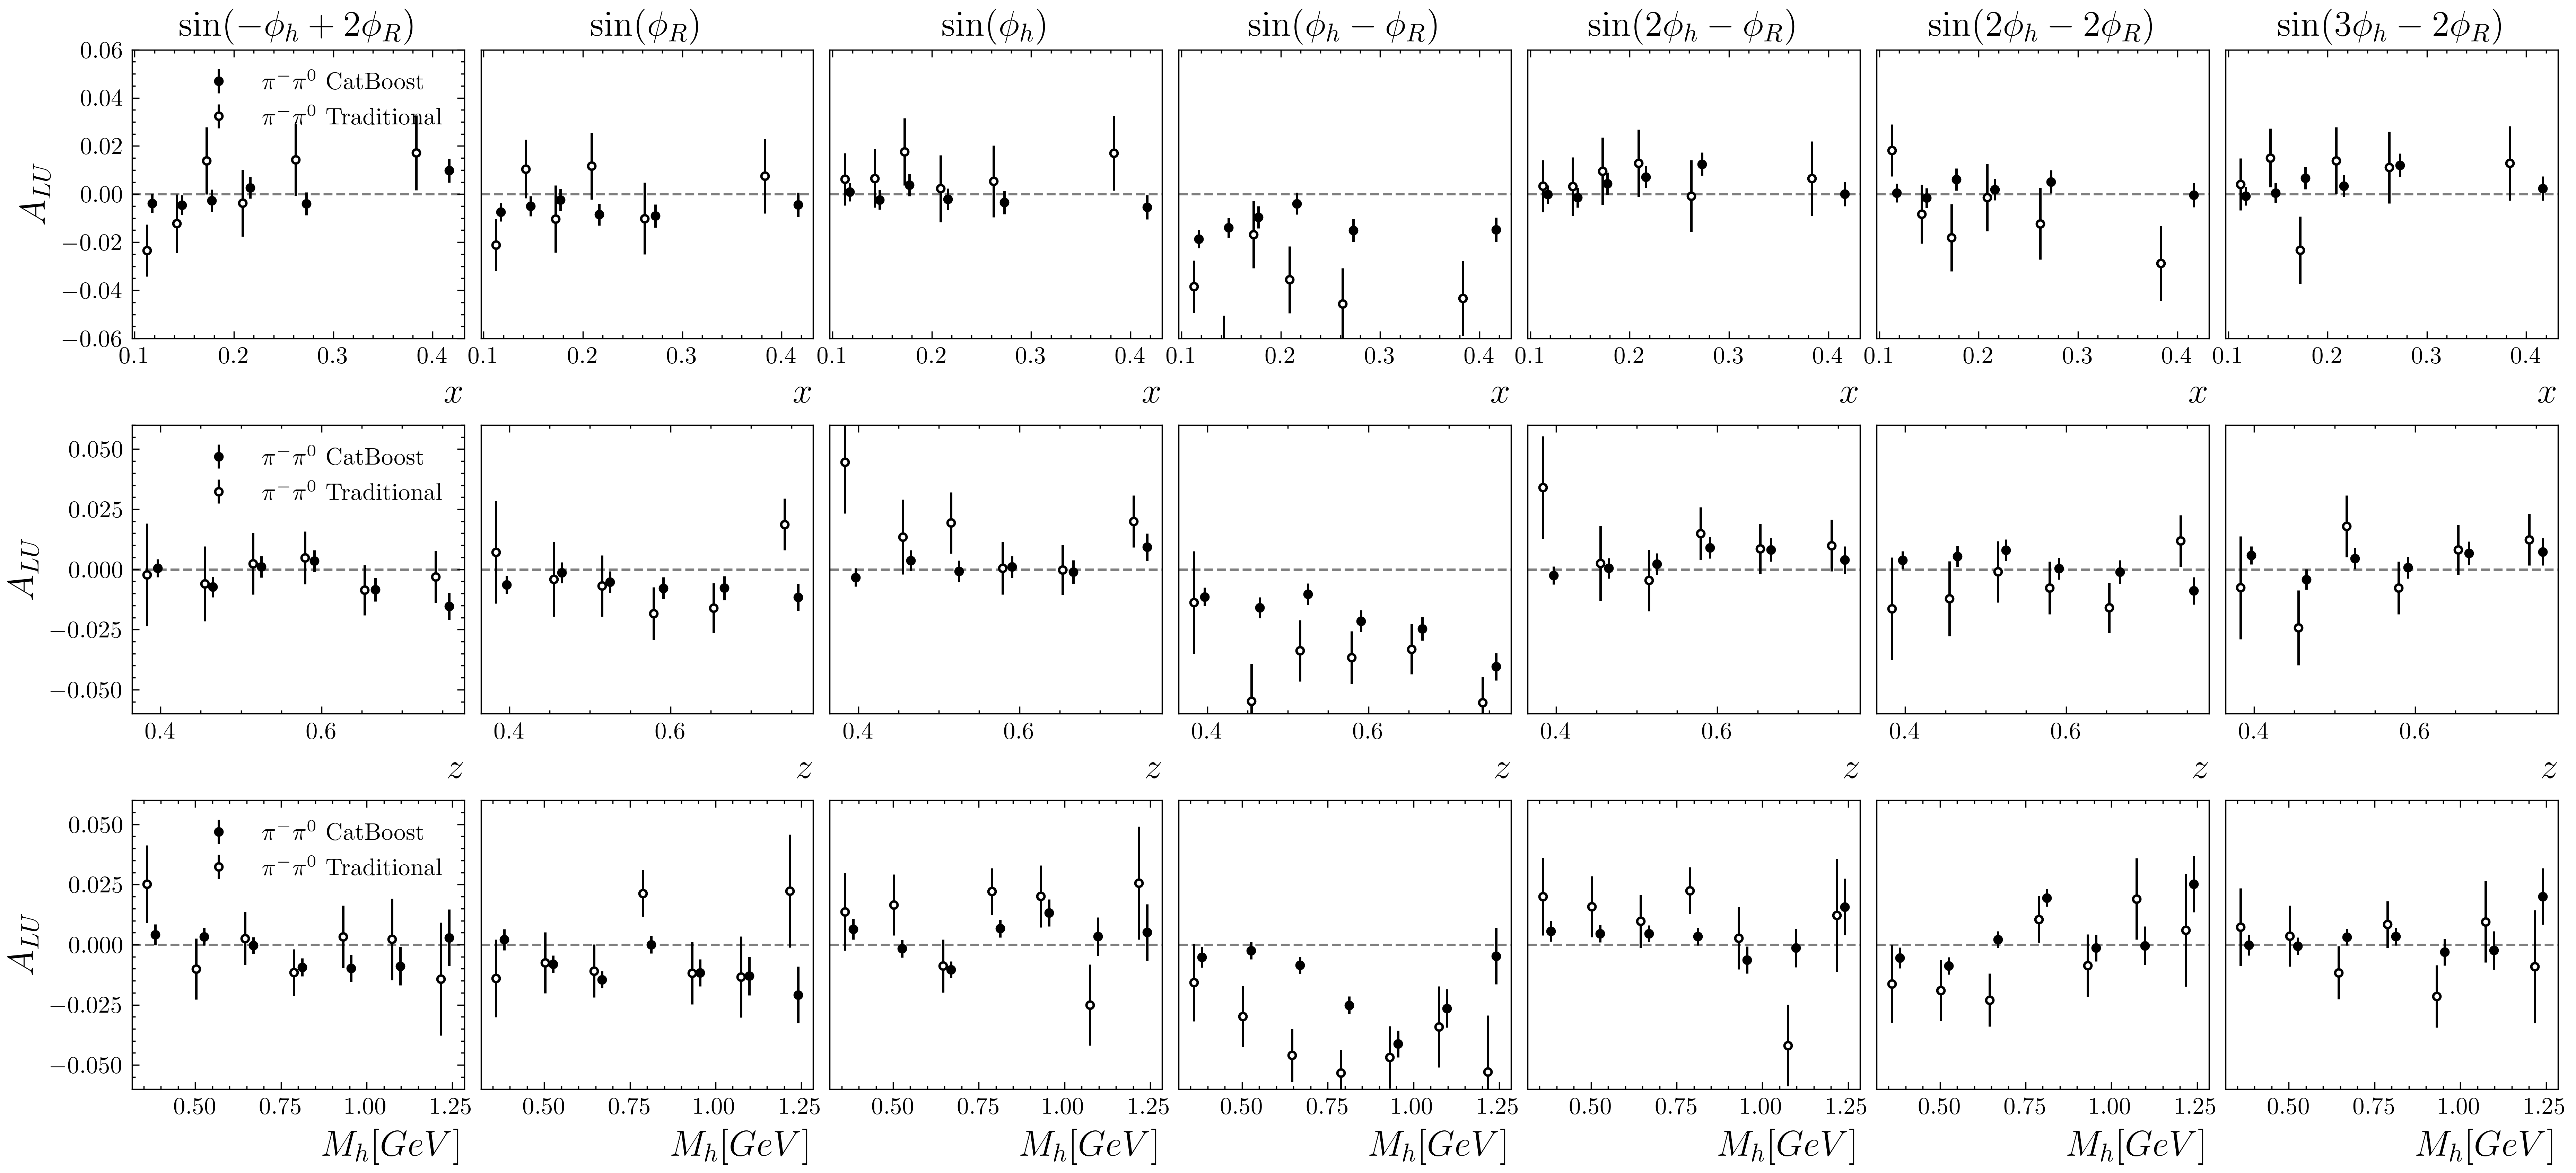

In [50]:
plotA(params_ML_piminus,params_noML_piminus)

# Compare PiPlus PiMinus (w/ and w/o ML)
---

In [18]:
def plotB(params_ML_p,params_noML_p,params_ML_m,params_noML_m):
    mods = get_modulations(2)[1]
    labels = ["A","B","C","D","E","F","G"]
    bins=["x","z","Mh"]
    # Comparison between methods plot
    fig,axs=plt.subplots(3,7,figsize=(18,8),dpi=150)
    fig.subplots_adjust(0,0,1,1,0.05,0.3)
    colors=["black","red"]
    channel=["\pi^{+}\pi^{0}","\pi^{-}\pi^{0}"]
    for idx,[params_ML,params_noML] in enumerate([[params_ML_p,params_noML_p],[params_ML_m,params_noML_m]]):
        for r in range(3):

            # Get the bins
            for p in params_noML:
                if(p["name"][0]==bins[r]):
                    p_noML=p
                    break
            for p in params_ML:
                if(p["name"][0]==bins[r]):
                    p_ML=p
                    break

            xtitle = p_ML["name"][0]
            xbinwidth = (p_ML["rightEdge"]-p_ML["leftEdge"]).flatten()
            if(xtitle=="Mh"):
                xtitle="M_{h} [GeV]"
            x = p_ML["centers"].flatten()        
            # Line up ML and noML params to have same binning

            for c in range(7):

                y_ML, yerr_ML = p_ML[labels[c]], p_ML[labels[c]+"_err"]
                y_noML, yerr_noML = p_noML[labels[c]], p_noML[labels[c]+"_err"]

                x_ML = x+xbinwidth/12
                x_noML = x-xbinwidth/12
                # Plot
                axs[r,c].errorbar(x_ML,y_ML,yerr=yerr_ML,fmt=".", capsize=0, color=colors[idx],label=r"${}$ ML".format(channel[idx]))
                axs[r,c].errorbar(x_noML,y_noML,yerr=yerr_noML,fmt=".", capsize=0, color=colors[idx],mfc='white',label=r"${}$ Trad.".format(channel[idx]))

                # Plot horizontal line at 0
                axs[r,c].axhline(0, ls='--', color='black', alpha=0.5)

                if(r==0):
                    axs[r,c].set_title(r"${}$".format(mods[c]),fontsize=15) # Place title at top row

                axs[r,c].set_xlabel(r"${}$".format(xtitle),loc="right",fontsize=15) # Place 

                if(c>0):
                    axs[r,c].tick_params(labelleft=False) # Remove yticks from inner plots
                if(c==0):
                    axs[r,c].set_ylabel(r"$A_{LU}$",fontsize=15)
                    axs[r,c].legend(ncol=2,columnspacing=1.0,borderpad=0.1)
                axs[r,c].set_ylim(-0.08,0.08)

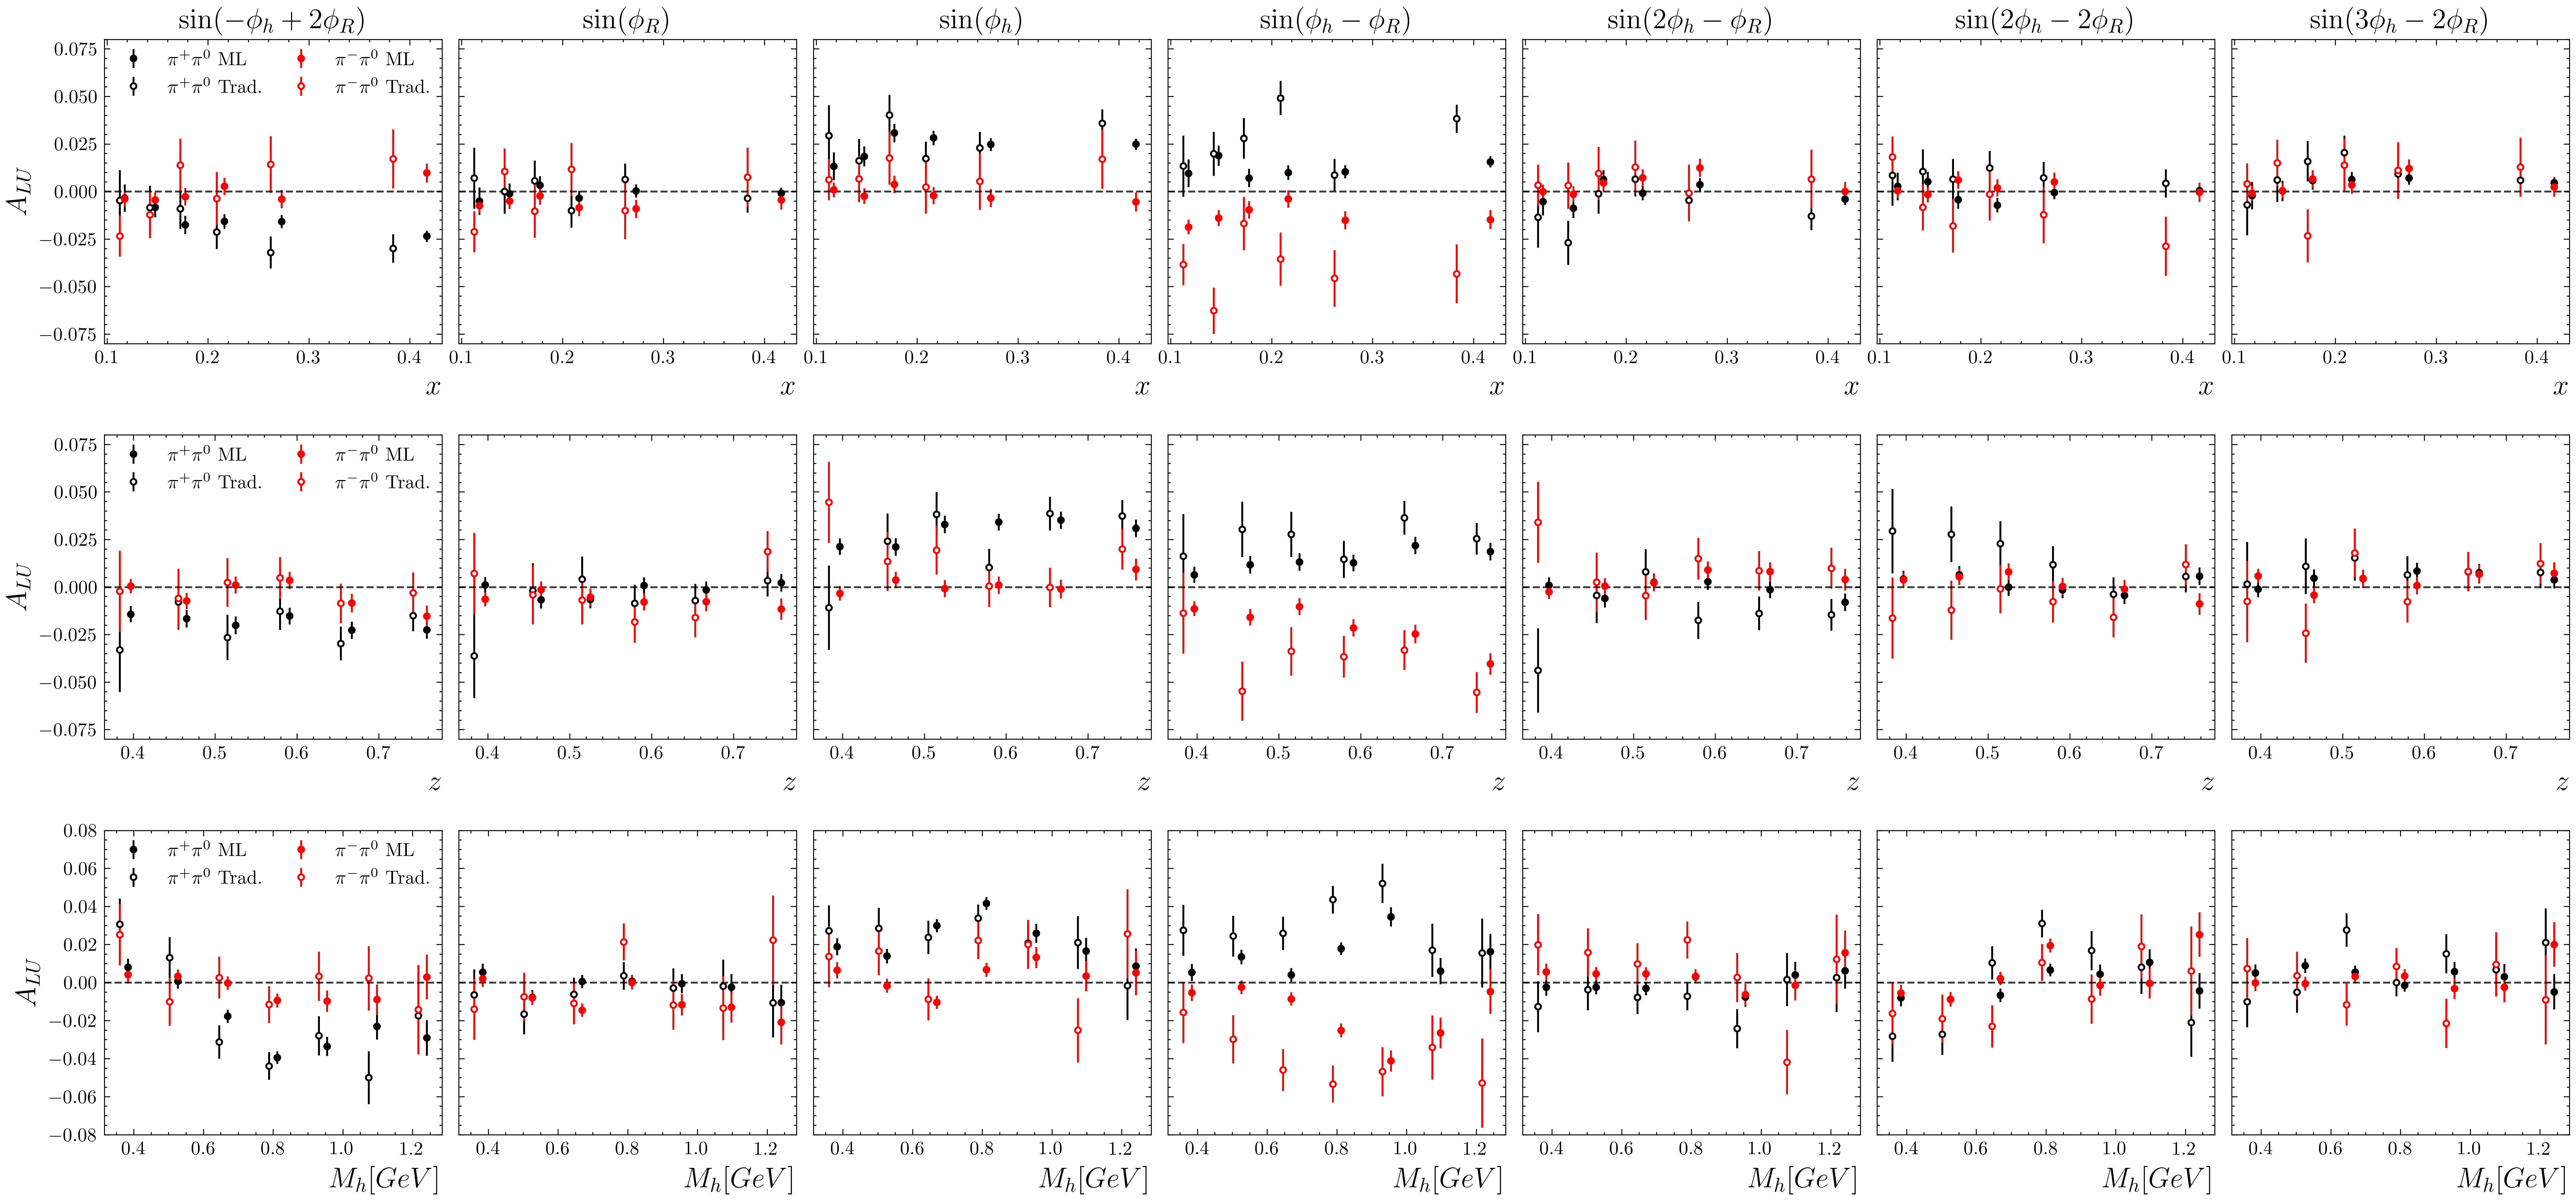

In [35]:
plotB(params_ML_piplus,params_noML_piplus,params_ML_piminus,params_noML_piminus)

# Compare PiPlus PiMinus w/ ML
---

In [6]:
def plotC(params_ML_p,params_ML_m):
    mods = get_modulations(2)[1]
    labels = ["A","B","C","D","E","F","G"]
    bins=["x","z","Mh"]
    # Comparison between methods plot
    fig,axs=plt.subplots(3,7,figsize=(14,6),dpi=100)
    fig.subplots_adjust(0,0,1,1,0.05,0.3)
    colors=["black","red"]
    channel=["\pi^{+}\pi^{0}","\pi^{-}\pi^{0}"]
    for idx,params_ML in enumerate([params_ML_p,params_ML_m]):
        for r in range(3):

            # Get the bins
            for p in params_ML:
                if(p["name"][0]==bins[r]):
                    p_ML=p
                    break

            xtitle = p_ML["name"][0]
            xbinwidth = (p_ML["rightEdge"]-p_ML["leftEdge"]).flatten()
            if(xtitle=="Mh"):
                xtitle="M_{h} [GeV]"
            x = p_ML["centers"].flatten()        
            # Line up ML and noML params to have same binning

            for c in range(7):

                y_ML, yerr_ML = p_ML[labels[c]], p_ML[labels[c]+"_err"]
                
                x_ML = x
                # Plot
                axs[r,c].errorbar(x_ML,y_ML,yerr=yerr_ML,fmt=".", capsize=0, color=colors[idx],label=r"${}$ ML".format(channel[idx]))
                
                # Plot horizontal line at 0
                axs[r,c].axhline(0, ls='--', color='black', alpha=0.5)

                if(r==0):
                    axs[r,c].set_title(r"${}$".format(mods[c]),fontsize=15) # Place title at top row

                axs[r,c].set_xlabel(r"${}$".format(xtitle),loc="right",fontsize=15) # Place 

                if(c>0):
                    axs[r,c].tick_params(labelleft=False) # Remove yticks from inner plots
                if(c==0):
                    axs[r,c].set_ylabel(r"$A_{LU}$",fontsize=15)
                    axs[r,c].legend()
                axs[r,c].set_ylim(-0.05,0.05)
    plt.savefig("test.pdf")

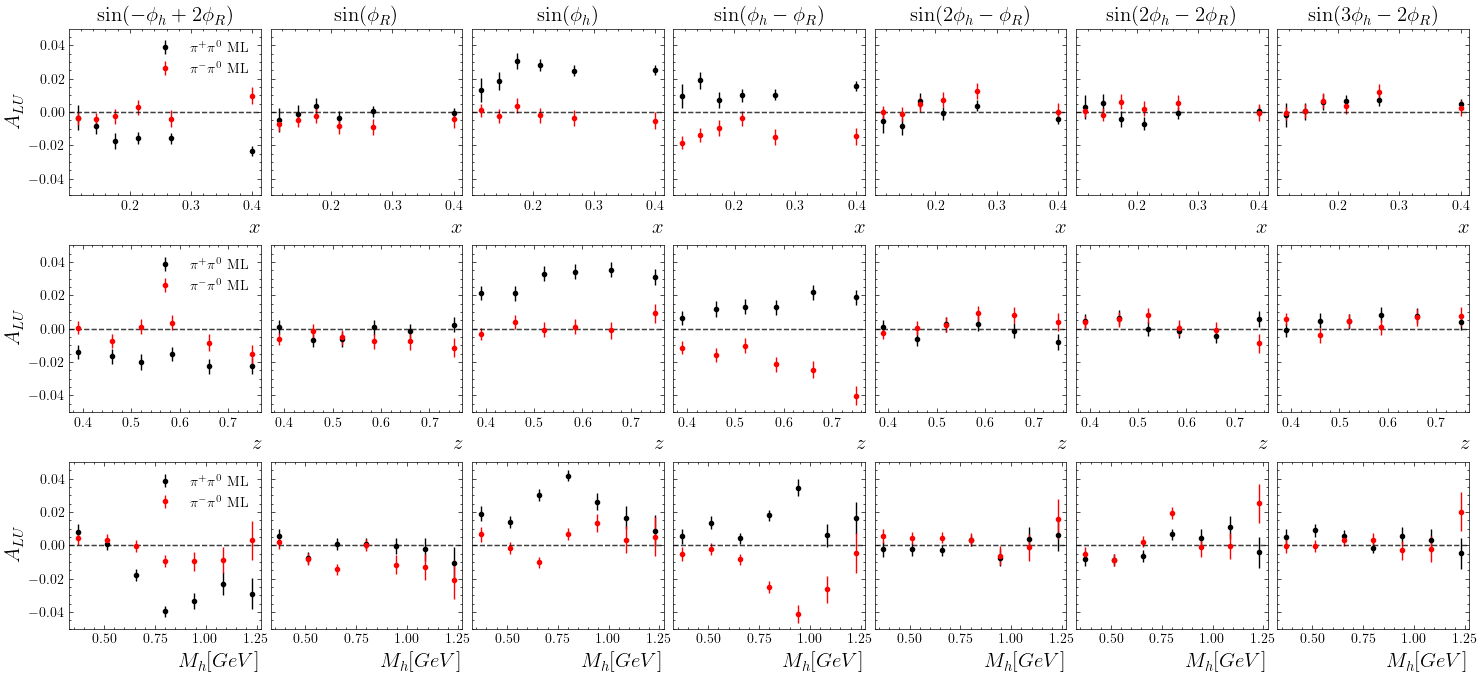

In [7]:
#plt.style.use('science')
plotC(params_ML_piplus,params_ML_piminus)

# Compare PiPlus PiMinus w/o ML
---

In [40]:
def plotD(params_noML_p,params_noML_m):
    mods = get_modulations(2)[1]
    labels = ["A","B","C","D","E","F","G"]
    bins=["x","z","Mh"]
    # Comparison between methods plot
    fig,axs=plt.subplots(3,7,figsize=(14,6),dpi=500)
    fig.subplots_adjust(0,0,1,1,0.05,0.3)
    colors=["black","red"]
    channel=["\pi^{+}\pi^{0}","\pi^{-}\pi^{0}"]
    for idx,params_noML in enumerate([params_noML_p,params_noML_m]):
        for r in range(3):

            # Get the bins
            for p in params_noML:
                if(p["name"][0]==bins[r]):
                    p_noML=p
                    break

            xtitle = p_noML["name"][0]
            xbinwidth = (p_noML["rightEdge"]-p_noML["leftEdge"]).flatten()
            if(xtitle=="Mh"):
                xtitle="M_{h} [GeV]"
            x = p_noML["centers"].flatten()        
            # Line up ML and noML params to have same binning

            for c in range(7):

                y_noML, yerr_noML = p_noML[labels[c]], p_noML[labels[c]+"_err"]

                x_noML = x
                # Plot
                axs[r,c].errorbar(x_noML,y_noML,yerr=yerr_noML,fmt=".", capsize=0, color=colors[idx],mfc='white',label=r"${}$ Traditional".format(channel[idx]))

                # Plot horizontal line at 0
                axs[r,c].axhline(0, ls='--', color='black', alpha=0.5)

                if(r==0):
                    axs[r,c].set_title(r"${}$".format(mods[c]),fontsize=15) # Place title at top row

                axs[r,c].set_xlabel(r"${}$".format(xtitle),loc="right",fontsize=15) # Place 

                if(c>0):
                    axs[r,c].tick_params(labelleft=False) # Remove yticks from inner plots
                if(c==0):
                    axs[r,c].set_ylabel(r"$A_{LU}$",fontsize=15)
                    axs[r,c].legend()
                axs[r,c].set_ylim(-0.08,0.08)

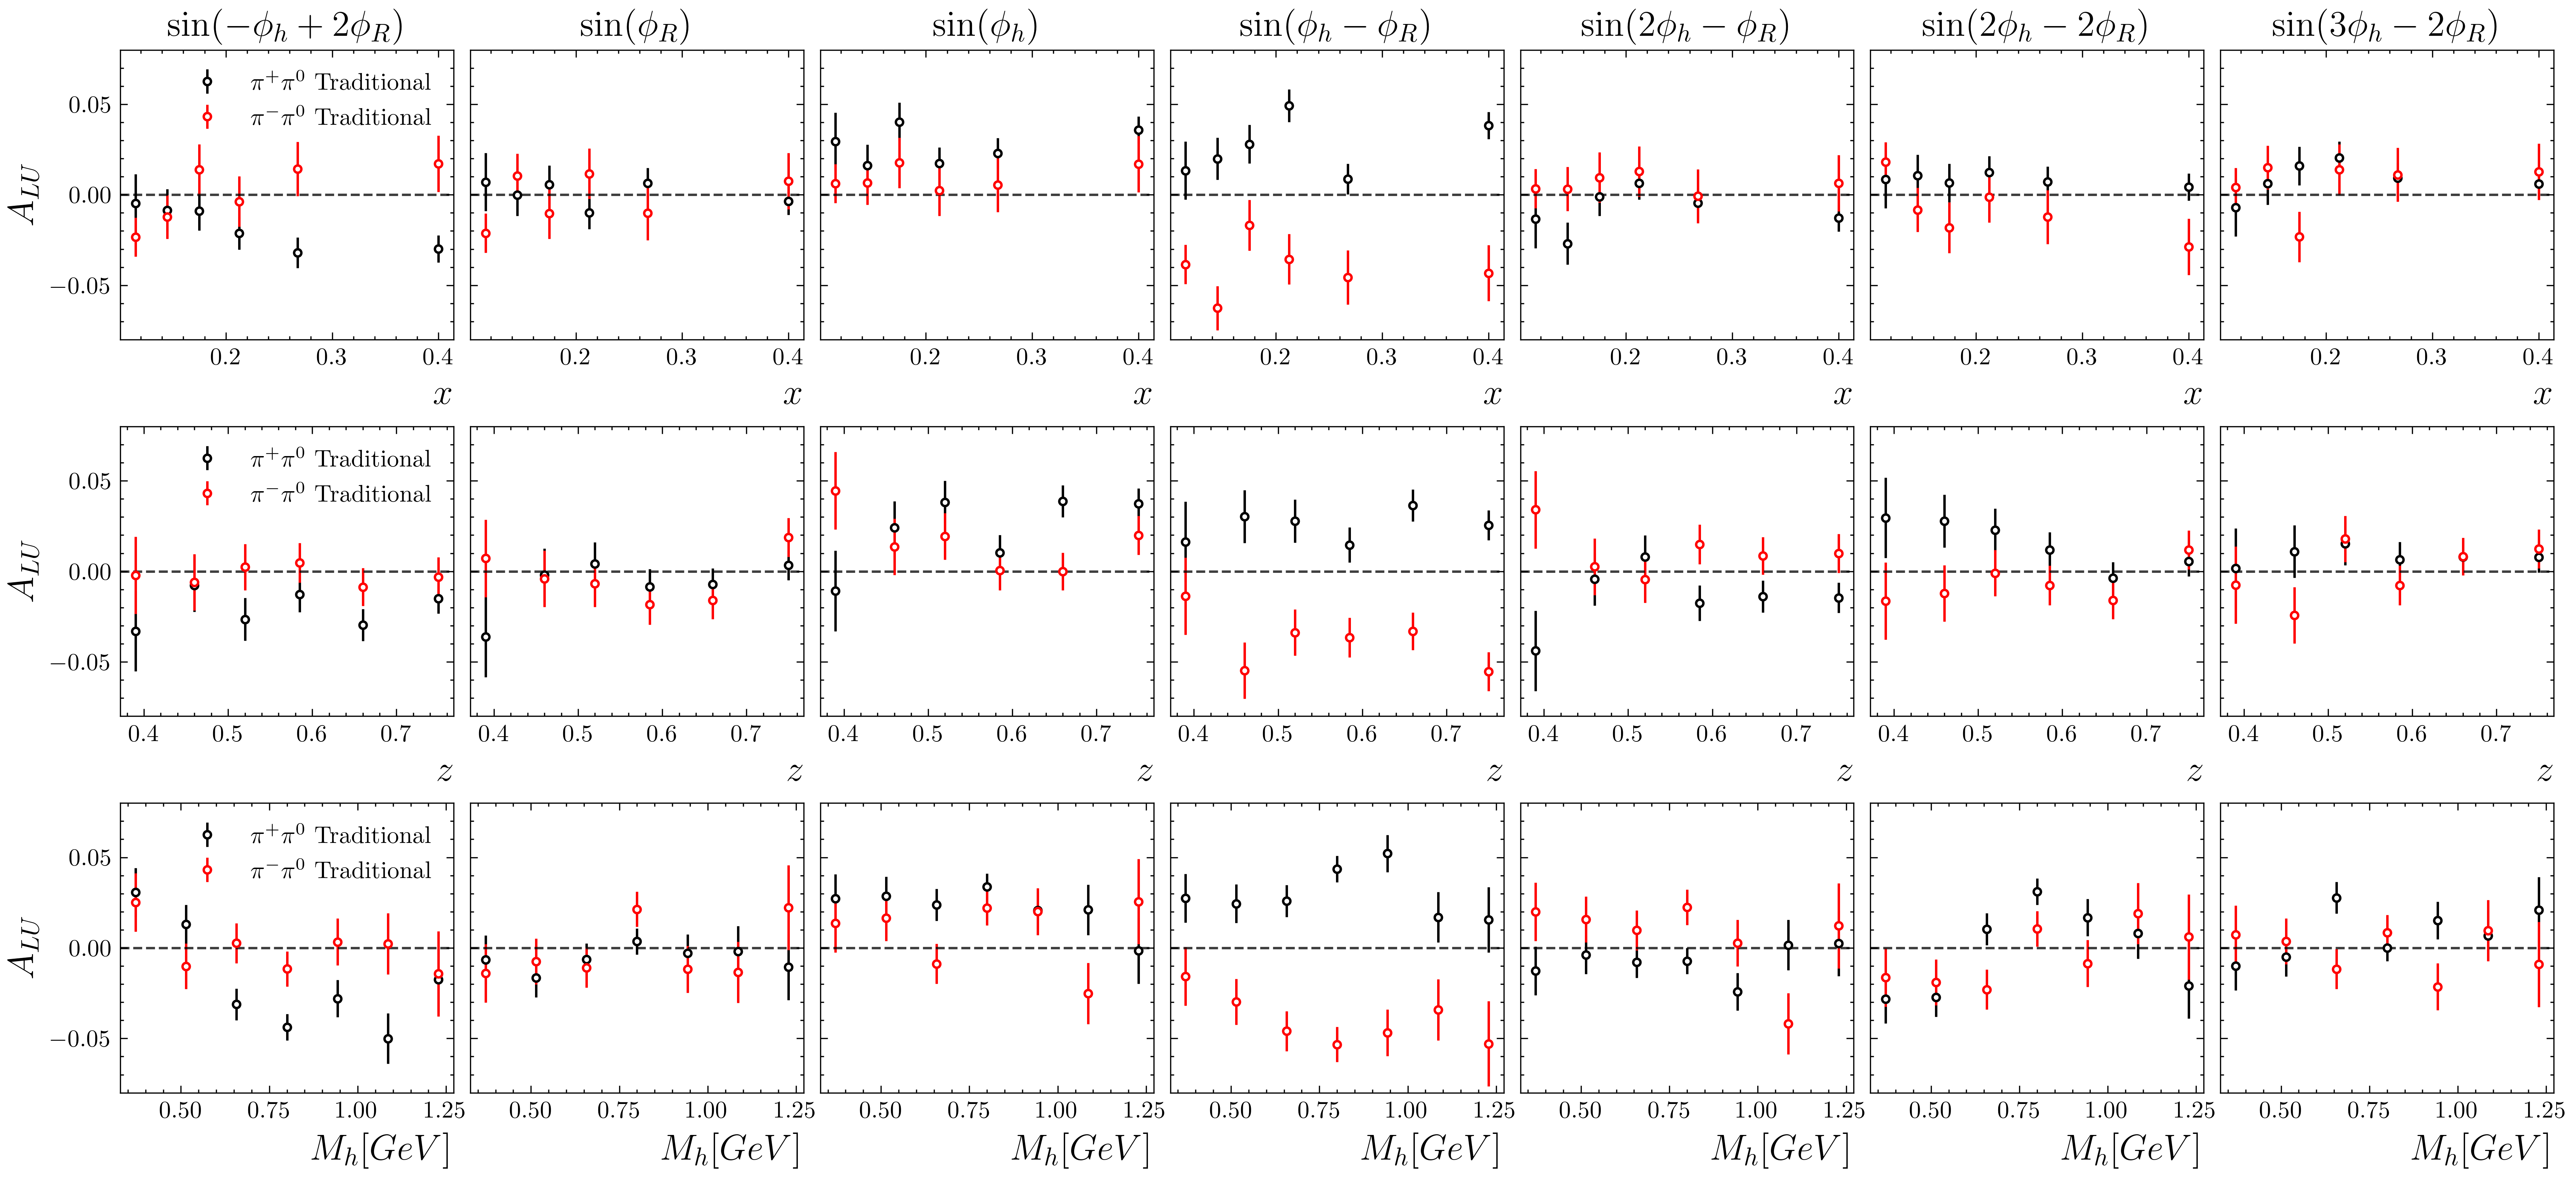

In [41]:
plotD(params_noML_piplus,params_noML_piminus)

# Minimial ML
---


In [10]:
def plotC2(params_ML_p,params_ML_m):
    mods = get_modulations(2)[1]
    labels = ["A","B","C","D","E","F","G"]
    mods = [mods[1],mods[3],mods[5]]
    labels = [labels[1],labels[3],labels[5]]
    bins=["x","z","Mh"]
    # Comparison between methods plot
    fig,axs=plt.subplots(3,3,figsize=(6,6),dpi=100)
    fig.subplots_adjust(0,0,1,1,0.05,0.3)
    colors=["black","red"]
    channel=["\pi^{+}\pi^{0}","\pi^{-}\pi^{0}"]
    for idx,params_ML in enumerate([params_ML_p,params_ML_m]):
        for r in range(3):

            # Get the bins
            for p in params_ML:
                if(p["name"][0]==bins[r]):
                    p_ML=p
                    break

            xtitle = p_ML["name"][0]
            xbinwidth = (p_ML["rightEdge"]-p_ML["leftEdge"]).flatten()
            if(xtitle=="Mh"):
                xtitle="M_{h} [GeV]"
            x = p_ML["centers"].flatten()        
            # Line up ML and noML params to have same binning

            for c in range(3):

                y_ML, yerr_ML = p_ML[labels[c]], p_ML[labels[c]+"_err"]
                
                x_ML = x
                # Plot
                axs[r,c].errorbar(x_ML,y_ML,yerr=yerr_ML,fmt=".", capsize=0, color=colors[idx],label=r"${}$ ML".format(channel[idx]))
                
                # Plot horizontal line at 0
                axs[r,c].axhline(0, ls='--', color='black', alpha=0.5)

                if(r==0):
                    axs[r,c].set_title(r"${}$".format(mods[c]),fontsize=15) # Place title at top row

                axs[r,c].set_xlabel(r"${}$".format(xtitle),loc="right",fontsize=15) # Place 

                if(c>0):
                    axs[r,c].tick_params(labelleft=False) # Remove yticks from inner plots
                if(c==0):
                    axs[r,c].set_ylabel(r"$A_{LU}$",fontsize=15)
                    axs[r,c].legend()
                axs[r,c].set_ylim(-0.05,0.05)
    plt.savefig("test.pdf")

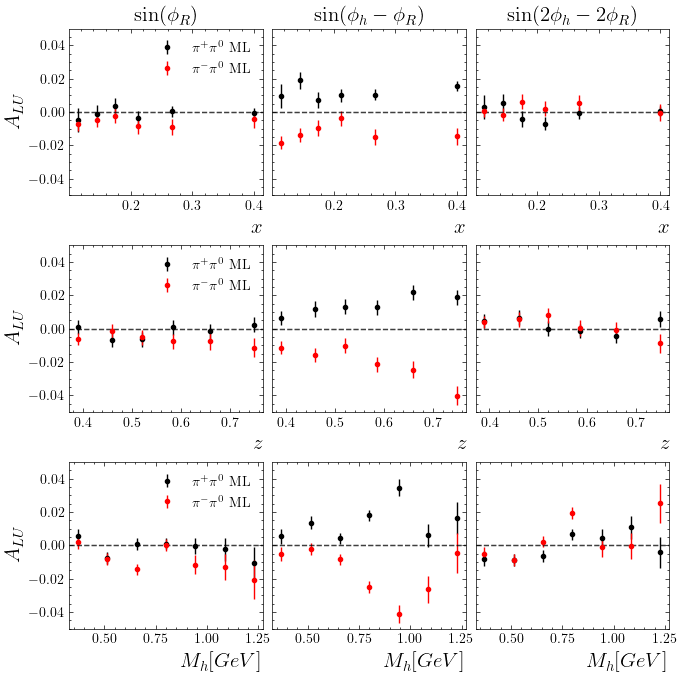

In [11]:
#plt.style.use('science')
plotC2(params_ML_piplus,params_ML_piminus)

---
---
---
---
# 2d Binning
---
---
---
---

In [7]:
params_ML_piplus,params_noML_piplus,params_ML_piminus,params_noML_piminus = get_params_2d('splot','nSidis_Fall2018_inbending','nSidis_Fall2018_outbending')

# 2D binning

In [6]:
def plotE(params_ML):
    mods = get_modulations(2)[1]
    labels = ["A","B","C","D","E","F","G"]
    bins=[["x","Mh"],["z","Mh"]]
    
    # Comparison between methods plot
    fig,axs=plt.subplots(2,7,figsize=(14,4),dpi=150)
    fig.subplots_adjust(0,0,1,1,0.05,0.3)
    colors = ["orange", "green", "blue", "purple", "red"]
    
    # Get number of bins in 2nd dimension


    for r in range(2):
        
        
        # Get the bins
        for p in params_ML:
            if(p["name"]==bins[r]):
                p_ML=p
                break

        xtitle = p_ML["name"][0]
        ytitle = p_ML["name"][1]
        xbinwidth = (p_ML["rightEdge"]-p_ML["leftEdge"]).flatten()
        if(xtitle=="Mh"):
            xtitle="M_{h} [GeV]"
        if(ytitle=="Mh"):
            ytitle="M_{h}"
        # Get number of bins in 2nd dimension
        L2 = len(np.unique(p_ML["centers"][:,1]))
        # Get number of bins in 1st dimension
        L1 = len(np.unique(p_ML["centers"][:,0]))
        # Get the bin ranges of the 2nd dimension
        
        left = np.unique(p_ML["leftEdge"][:,1])
        right = np.unique(p_ML["rightEdge"][:,1])
        
        X = np.split(p_ML["centers"][:,0],L2)
        
        # Line up ML and noML params to have same binning

        for c in range(7):

            Y_ML, Yerr_ML = np.split(p_ML[labels[c]],L2), np.split(p_ML[labels[c]+"_err"],L2)

            for ic,[x,y_ML,yerr_ML] in enumerate(zip(X,Y_ML,Yerr_ML)):
                x_ML = x
                # Plot
                axs[r,c].errorbar(x_ML,y_ML,yerr=yerr_ML,fmt=".", capsize=1, color=colors[ic],label=r"${}<{}<{}$ ".format(left[ic],ytitle,right[ic]))

                # Plot horizontal line at 0
                axs[r,c].axhline(0, ls='--', color='black', alpha=0.5)

                if(r==0):
                    axs[r,c].set_title(r"${}$".format(mods[c]),fontsize=15) # Place title at top row

                axs[r,c].set_xlabel(r"${}$".format(xtitle),loc="right",fontsize=15) # Place 

                if(c>0):
                    axs[r,c].tick_params(labelleft=False) # Remove yticks from inner plots
                if(c==0):
                    axs[r,c].set_ylabel(r"$A_{LU}$",fontsize=15)
                    axs[r,c].legend()
                axs[r,c].set_ylim(-0.07,0.07)
    plt.savefig("test.pdf")

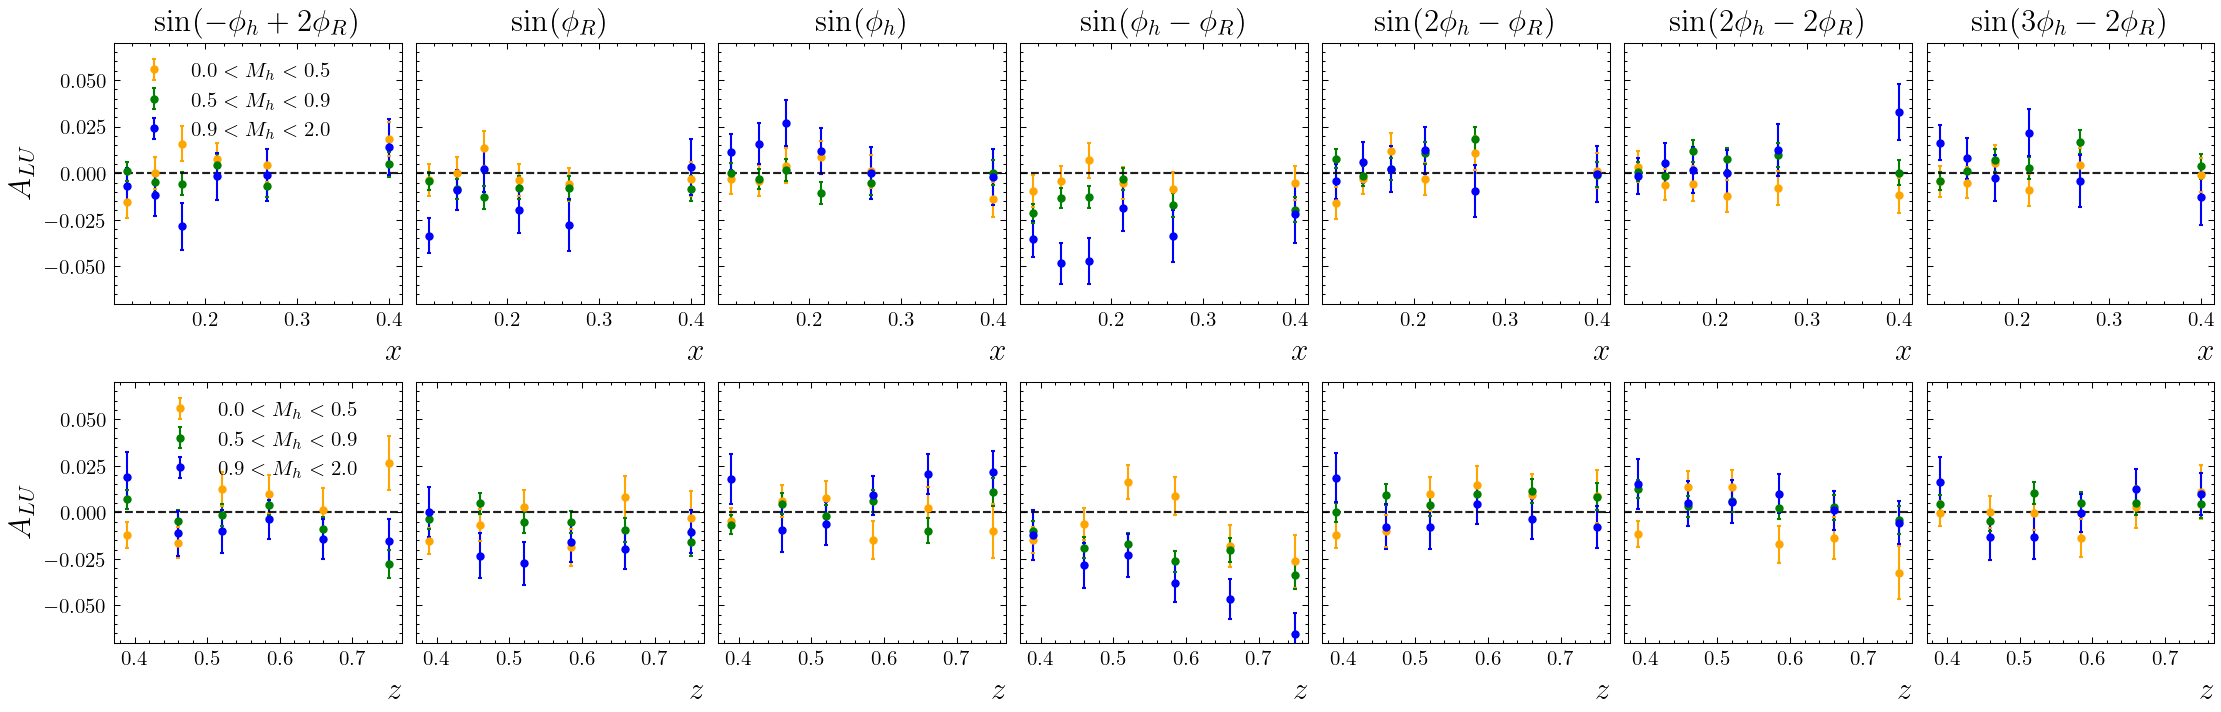

In [9]:
plotE(params_ML_piminus)